# Week 5

# Getting Started with Pandas (Part 2)
# Data Analysis with Data Frames

In this week, we will look into a data set about movies and use data frames to perform data analysis.

In [1]:
import pandas as pd

## 1. Download and extract MovieLens data

- [MovieLens](https://grouplens.org/datasets/movielens/) is a web-based recommender system and virtual community that recommends movies for its users to watch, based on their file preferences using collaborative filtering of members' movie ratings and movie reviews. 
- We will look at its `ml-latest-small` dataset.

In [2]:
# Download ml-latest-small.zip from https://grouplens.org/datasets/movielens/
import os 
import urllib.request
url = "http://files.grouplens.org/datasets/movielens/ml-latest-small.zip"
file_path = "Data/"
zip_file = "ml-latest-small.zip"

# Create the Data folder if it doesn't already exist.
if not os.path.isfile(file_path):
    os.mkdir(file_path)

# Download file
urllib.request.urlretrieve(url, file_path + zip_file)

FileExistsError: [WinError 183] Cannot create a file when that file already exists: 'Data/'

In [ ]:
# Decompress the zip file
import zipfile
f = zipfile.ZipFile(file_path + zip_file, "r")
f.printdir()
f.extractall(file_path)
f.close()

In [ ]:
# Check that files has been unzipped
print(os.listdir(file_path + "ml-latest-small"))

In [ ]:
# Delete the zip file
os.remove(file_path + zip_file)
os.listdir(file_path)

In [ ]:
# Write a function to download and decompress file
import os
import urllib.request
import zipfile

def get_movielens(file_path, file_name, delete_zip_file=False):
    url = "http://files.grouplens.org/datasets/movielens/" + file_name
    if not os.path.exists(file_path):
        os.mkdir(file_path)
    if not os.path.exists(file_path + file_name):
        urllib.request.urlretrieve(url, file_path + file_name)
        print("File", file_name, "downloaded.")
    with zipfile.ZipFile(file_path + file_name, "r") as f:
        f.extractall(file_path)
        print("Files extracted:")
        print(f.printdir())
    if delete_zip_file:
        os.remove(file_path + file_name)

In [ ]:
get_movielens(file_path, zip_file)

## 2. Load ratings data as a pandas DataFrame
- Load csv file as a DataFrame
- head()
- shape, columns, dtypes
- indexing with loc[]
- Handle date and time data
- Data transformation with apply()

In [ ]:
ratings_df = pd.read_csv("Data/ml-latest-small/ratings.csv",
                         sep=",")
ratings_df.head()  # Show the first several rows of the dataset

In [ ]:
# Display the shape of data

print(ratings_df.shape)

In [ ]:
# Display the types of each feature

print(ratings_df.dtypes)

In [ ]:
# Convert time stamp to a readable format
from datetime import datetime

# Example: convert the first time stamp
timestamp = ratings_df.loc[0, "timestamp"]
print(timestamp)

dt = datetime.fromtimestamp(timestamp)
print(dt)

ratings_df.loc[0, "Year"] = dt.year
ratings_df.loc[0, "Month"] = dt.month
ratings_df.loc[0, "Day"] = dt.day
ratings_df.loc[0, "Hour"] = dt.hour
ratings_df.loc[0, "Minute"] = dt.minute
ratings_df.loc[0, "Second"] = dt.second
ratings_df.head()

In [ ]:
# Use apply() to apply a function to all rows
ratings_df["DT"] = ratings_df["timestamp"].apply(datetime.fromtimestamp)
ratings_df.head()

We can also create functions to fill column year, month, ...

In [ ]:
# Ex: Fill the year column

ratings_df['Year'] = ratings_df['DT'].dt.year # use built-in date-time converter
# ratings_df.dtypes
ratings_df.head()

In [ ]:
# Alternatively, create a function that extracts the year from a datetime object
def get_year(x):
    return x.year

In [ ]:
ratings_df['Year'] = ratings_df['DT'].apply(get_year)

## 3. Save the processed ratings data

Data can be saved in many different formats. Today we will save the processed rating data as a new CSV file.

In [ ]:
# Save the processed data as a .csv file
csv_file = "Data/ml-latest-small/ratings_processed.csv"
ratings_df.to_csv(csv_file)

In [3]:
# Ex: Load the new file and display its first 5 rows.
ratings_df = pd.read_csv('Data/ml-latest-small/ratings_processed.csv', sep = ',', index_col=0)
ratings_df.head()

,userId,movieId,rating,timestamp,Year,Month,Day,Hour,Minute,Second,DT
0,1,1,4.0,964982703,2000,7.0,30.0,14.0,45.0,3.0,2000-07-30 14:45:03
1,1,3,4.0,964981247,2000,NaN,NaN,NaN,NaN,NaN,2000-07-30 14:20:47
2,1,6,4.0,964982224,2000,NaN,NaN,NaN,NaN,NaN,2000-07-30 14:37:04
3,1,47,5.0,964983815,2000,NaN,NaN,NaN,NaN,NaN,2000-07-30 15:03:35
4,1,50,5.0,964982931,2000,NaN,NaN,NaN,NaN,NaN,2000-07-30 14:48:51


## 4. Analyzing MovieLens Data
- Distribution of movie ratings
- Popular movies

In [4]:
# Use value_counts() to find the rating frequencies
rating_frequencies = ratings_df['rating'].value_counts()
print(rating_frequencies)

4.0    26818
3.0    20047
5.0    13211
3.5    13136
4.5     8551
2.0     7551
2.5     5550
1.0     2811
1.5     1791
0.5     1370
Name: rating, dtype: int64


In [5]:
# Find sorted the rating frequencies
rating_frequencies = ratings_df['rating'].value_counts().sort_index(ascending=False)
print(rating_frequencies)

5.0    13211
4.5     8551
4.0    26818
3.5    13136
3.0    20047
2.5     5550
2.0     7551
1.5     1791
1.0     2811
0.5     1370
Name: rating, dtype: int64


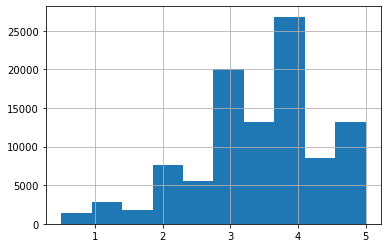

In [6]:
# Visualize rating frequencies
ratings_df['rating'].hist()

In [7]:
# Which years were these ratings created?

print("Earliest year of rating:", ratings_df['Year'].min())
print("Latest year of rating:", ratings_df['Year'].max())

print("The years of ratings:", set(ratings_df['Year']))

Earliest year of rating: 1996
Latest year of rating: 2018
The years of ratings: {1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018}


In [8]:
# How are rating frequencies distributed in 2018?

# Create a filter in two steps
filter_2018 = (ratings_df['Year'] == 2018)
ratings_2018 = ratings_df[filter_2018]
ratings_2018.head()

,userId,movieId,rating,timestamp,Year,Month,Day,Hour,Minute,Second,DT
1839,18,913,4.0,1517525849,2018,NaN,NaN,NaN,NaN,NaN,2018-02-01 17:57:29
1852,18,1193,4.5,1517686025,2018,NaN,NaN,NaN,NaN,NaN,2018-02-03 14:27:05
1980,18,5120,4.5,1516054115,2018,NaN,NaN,NaN,NaN,NaN,2018-01-15 17:08:35
2012,18,6787,4.0,1534020896,2018,NaN,NaN,NaN,NaN,NaN,2018-08-11 16:54:56
2053,18,27878,4.5,1526159893,2018,NaN,NaN,NaN,NaN,NaN,2018-05-12 17:18:13


In [9]:
# Create a filter in one step:
ratings_2018 = ratings_df[ratings_df['Year'] == 2018]
ratings_2018.head()

,userId,movieId,rating,timestamp,Year,Month,Day,Hour,Minute,Second,DT
1839,18,913,4.0,1517525849,2018,NaN,NaN,NaN,NaN,NaN,2018-02-01 17:57:29
1852,18,1193,4.5,1517686025,2018,NaN,NaN,NaN,NaN,NaN,2018-02-03 14:27:05
1980,18,5120,4.5,1516054115,2018,NaN,NaN,NaN,NaN,NaN,2018-01-15 17:08:35
2012,18,6787,4.0,1534020896,2018,NaN,NaN,NaN,NaN,NaN,2018-08-11 16:54:56
2053,18,27878,4.5,1526159893,2018,NaN,NaN,NaN,NaN,NaN,2018-05-12 17:18:13


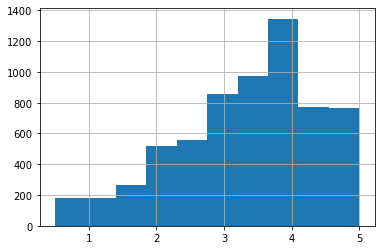

In [10]:
ratings_2018['rating'].hist()

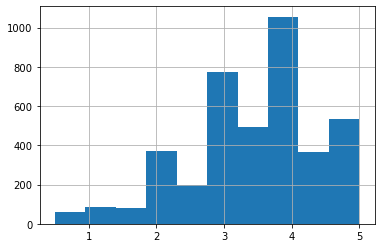

In [12]:
# How are rating frequencies distributed in 2003?
ratings_df[ratings_df['Year'] == 2003]['rating'].hist()

Next, let's identify some popular movies.

In [13]:
# Which movie received the highest number of ratings?

ratings_df['movieId'].value_counts() # 356, 318, 296 receive the most ratings.

356       329
318       317
296       307
593       279
2571      278
         ... 
5986        1
100304      1
34800       1
83976       1
8196        1
Name: movieId, Length: 9724, dtype: int64

In [14]:
# What is the name of the movie? (The answer requires another data file.)

# Load movies.csv
movies_df = pd.read_csv('Data/ml-latest-small/movies.csv', sep=',')
movies_df.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [16]:
# Find out the title corresponding to the movies with high number of ratings.

ids = [356, 318, 296]

# movies_df[movies_df['movieId'] == 356]
movies_df[movies_df['movieId'].isin(ids)]

,movieId,title,genres
257,296,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller
277,318,"Shawshank Redemption, The (1994)",Crime|Drama
314,356,Forrest Gump (1994),Comedy|Drama|Romance|War


In [ ]:
# Which movie receives the largest amount of 5.0?



In [ ]:
# Find the name of this movie



In [ ]:
# Which movie has the highest average rating?



In [ ]:
# Find the top ten highest-rated movies.

